# AMAZON.COM, INC Stock Prediction

**Amazon.com**, Inc, is an American multinational technology company based in Seattle, Washington, that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is considered one of the *Big Four technology companies along with Google, Apple, and Facebook.*

Amazon was founded by **Jeff Bezos** on July 5, 1994, in Bellevue, Washington. The company initially started as an online marketplace for books but later expanded to sell electronics, software, video games, apparel, furniture, food, toys, and jewelry. In 2015, Amazon surpassed Walmart as the most valuable retailer in the United States by market capitalization. In 2017, Amazon acquired Whole Foods Market for $13.4 billion, which vastly increased Amazon's presence as a brick-and-mortar retailer. In 2018, Bezos announced that its two-day delivery service, Amazon Prime, had surpassed 100 million subscribers worldwide.

In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os
plt.rcParams['figure.figsize'] = 10,7

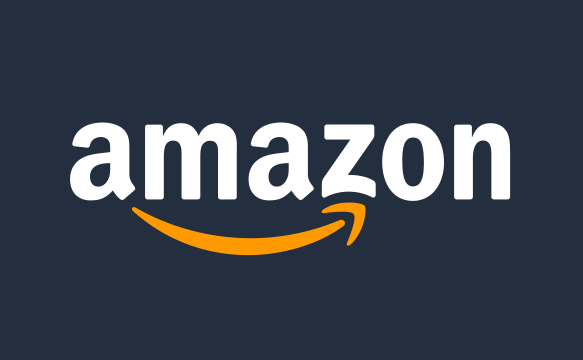

In [4]:
 Image.open(os.path.join('/content/drive/My Drive/amazon.png'))

In [5]:
# loading the data(yahoo finance API)
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 10, 1)

df = web.DataReader('AMZN', 'yahoo', start, end)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-18,1822.060059,1795.500000,1817.040039,1817.459961,2505600,1817.459961
2019-09-19,1832.569946,1817.900024,1821.020020,1821.500000,2031500,1821.500000
2019-09-20,1830.630005,1780.920044,1821.709961,1794.160034,5341900,1794.160034
2019-09-23,1792.699951,1767.319946,1777.000000,1785.300049,2922300,1785.300049
2019-09-24,1795.709961,1735.550049,1790.609985,1741.609985,4616000,1741.609985
2019-09-25,1773.000000,1723.000000,1747.359985,1768.329956,3493200,1768.329956
2019-09-26,1763.369995,1731.500000,1762.790039,1739.839966,3536800,1739.839966
2019-09-27,1749.119995,1713.819946,1748.000000,1725.449951,3907200,1725.449951
2019-09-30,1737.459961,1709.219971,1726.989990,1735.910034,2644700,1735.910034


**Amazon Data set**


1.   Date: This column represents date 
2.   High: It is the highest value of share on the give date/day.
3.   Low : It is the lowest value of share on the give date/day.
4.   Open:  The price at which a security first trades upon the opening of an exchange on a trading day.
5.   Close: The closing price of the stock.
6.  Volume:  The number of shares that changed hands during a given day. The transactions are measured on stocks.
7. Adj Close: Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions.


In [6]:
# We need to predict stock adjusted close.
data = pd.DataFrame()
data['ADJ_close'] =  df.iloc[:,-1]
data.sample(5)

,ADJ_close
Date,
2015-05-14,432.279999
2013-05-16,264.119995
2019-08-26,1768.869995
2011-09-07,219.899994
2013-09-20,316.339996


In [7]:
# calculating the moving average.
moving_avg = data.rolling(window = 12).mean()
moving_avg.sample(5)

,ADJ_close
Date,
2017-05-23,957.426661
2010-12-27,178.948332
2011-01-28,181.699167
2015-10-09,526.611659
2018-09-19,1966.369171


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


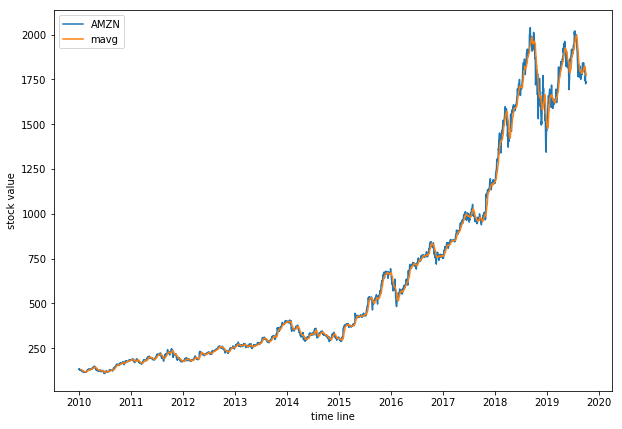

In [8]:
plt.plot(data, label='AMZN')
plt.plot(moving_avg, label='mavg')
plt.xlabel('time line')
plt.ylabel('stock value')
plt.legend()
plt.show()

## Share Returns

####  **(Opening stock - closing stock) * 100**

In [0]:
df['returns']  = (df['Open'] - df['Close'])*100

In [10]:
df.returns.head()

Date
2010-01-04    235.000610
2010-01-05   -126.000977
2010-01-06    235.000610
2010-01-07    200.999451
2010-01-08   -296.000671
Name: returns, dtype: float64

### JEFF BEZOS

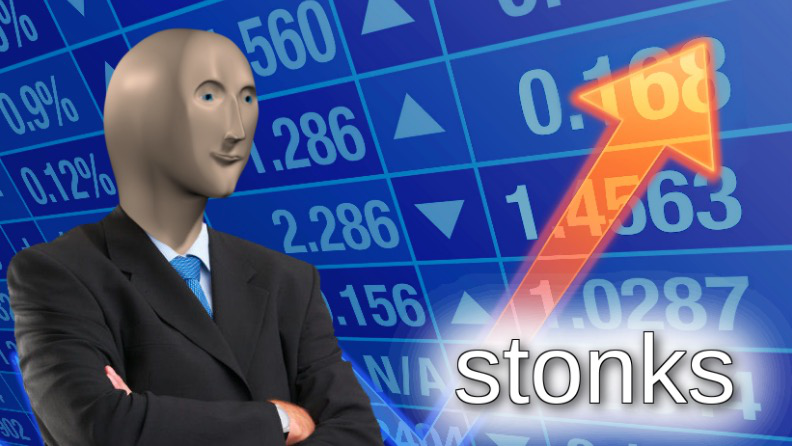

In [11]:
 Image.open(os.path.join('/content/drive/My Drive/stonks.jpg'))

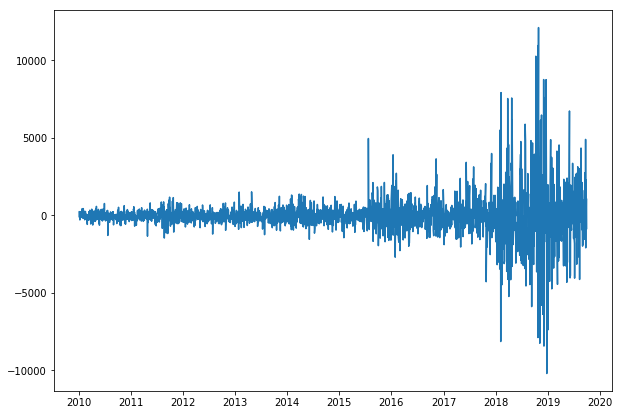

In [12]:
plt.plot(df.returns)

In [13]:
# Gathering data of some Big companies(aaple, google etc)
data_com = web.DataReader(['AMZN', 'AAPL', 'GE', 'GOOG', 'IBM'], 'yahoo', start=start, end=end)['Adj Close']
data_com.head()

Symbols,AAPL,AMZN,GE,GOOG,IBM
Date,,,,,
2010-01-04,26.681330,133.899994,10.895131,312.204773,98.142967
2010-01-05,26.727465,134.690002,10.951548,310.829926,96.957375
2010-01-06,26.302330,132.250000,10.895131,302.994293,96.327530
2010-01-07,26.253704,130.000000,11.459282,295.940735,95.994110
2010-01-08,26.428249,133.520004,11.706100,299.885956,96.957375


In [14]:
# stock of other companies with amazon's stock values correlation
retscomp = data_com.pct_change()
corr = retscomp.corr()
corr


Symbols,AAPL,AMZN,GE,GOOG,IBM
Symbols,,,,,
AAPL,1.000000,0.398092,0.321129,0.463133,0.386522
AMZN,0.398092,1.000000,0.300001,0.558279,0.352733
GE,0.321129,0.300001,1.000000,0.333010,0.437361
GOOG,0.463133,0.558279,0.333010,1.000000,0.407447
IBM,0.386522,0.352733,0.437361,0.407447,1.000000


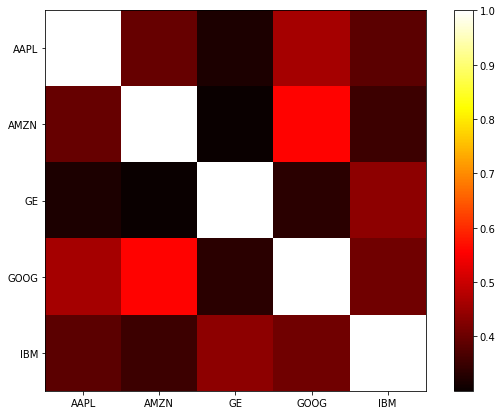

In [15]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

## Data Preparation and Preprocessing 

In [16]:
dfreg = df.loc[:, ['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

dfreg.dropna(inplace=True)
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,133.899994,7599900,2.591487,-1.724775
2010-01-05,134.690002,8851900,2.724774,0.944323
2010-01-06,132.250000,7178800,2.328924,-1.745918
2010-01-07,130.000000,11030200,2.707696,-1.522608
2010-01-08,133.520004,9830500,3.482620,2.267162


In [17]:
import math
import numpy as np
# Drop Missing values
dfreg.fillna(value=-99999, inplace=True)

# we want to separate the 1 percent of the data to the forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.iloc[:,:-1])
X

array([[ 1.33899994e+02,  7.59990000e+06,  2.59148721e+00,
        -1.72477512e+00],
       [ 1.34690002e+02,  8.85190000e+06,  2.72477400e+00,
         9.44322742e-01],
       [ 1.32250000e+02,  7.17880000e+06,  2.32892388e+00,
        -1.74591827e+00],
       ...,
       [ 1.72544995e+03,  3.90720000e+06,  2.04584600e+00,
        -1.29004856e+00],
       [ 1.73591003e+03,  2.64470000e+06,  1.62681186e+00,
         5.16508144e-01],
       [ 1.73565002e+03,  3.08450000e+06,  1.56655668e+00,
        -5.92782107e-01]])

In [18]:
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
X = preprocessing.scale(X)
X

array([[-0.91785581,  1.05398194,  0.25115398, -1.11940249],
       [-0.91644563,  1.48934145,  0.35741422,  0.58555934],
       [-0.9208011 ,  0.90755232,  0.04183059, -1.13290828],
       ...,
       [ 1.92310473, -0.23008518, -0.18384762, -0.84170859],
       [ 1.94177626, -0.66909586, -0.51791426,  0.31228065],
       [ 1.94131214, -0.51616367, -0.56595149, -0.3963099 ]])

In [19]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluatio
X_lately = X[-forecast_out:]
x= X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
print('Dimension of X',x.shape)
print('Dimension of y',y.shape)

Dimension of X (2428, 4)
Dimension of y (2428,)


In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y

array([ 118.02999878,  117.36000061,  120.08999634, ..., 1725.44995117,
       1735.91003418, 1735.65002441])

In [21]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


## Model Deployment


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)

In [23]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
confidencereg = model.score(X_test, y_test)

In [25]:
prediction = model.predict(X_lately)
prediction

array([1792.11556961, 1793.82176905, 1815.22028753, 1807.09453384,
       1818.58954935, 1829.80655001, 1869.64364025, 1863.03935064,
       1861.36875549, 1850.3354682 , 1853.0623524 , 1872.8923788 ,
       1869.30434218, 1836.87679907, 1852.6964884 , 1847.90440779,
       1851.48802496, 1823.4252763 , 1814.51180962, 1773.29184553,
       1798.69262638, 1769.38429218, 1754.69277877, 1765.37909879,
       1764.95591706])

In [26]:
dfreg['Forecast'] = np.nan
print("x = {0}\n\n set = {1}\n\n conf = {2}\n\n out = {3}".format(X_lately, prediction, confidencereg, forecast_out))

x = [[ 1.98804404e+00 -5.38696650e-01 -3.34275160e-01 -5.17675185e-01]
 [ 1.99236388e+00 -7.47335390e-01 -7.38933131e-01  3.19024482e-01]
 [ 2.03190229e+00 -5.40296214e-01 -8.64284427e-01  1.04155868e-01]
 [ 2.01385568e+00 -5.25135132e-01 -2.36364421e-01 -7.71041276e-01]
 [ 2.03804268e+00 -3.56728896e-01 -3.53878622e-01  6.98354358e-01]
 [ 2.05728533e+00 -7.80578496e-01 -1.31011802e+00 -1.72659204e-01]
 [ 2.12886489e+00 -4.37472088e-01 -6.70585034e-01  6.40426079e-01]
 [ 2.11599491e+00 -7.20490539e-01 -1.19525214e+00 -1.81323887e-01]
 [ 2.11213919e+00 -5.45720821e-01 -7.09570050e-01 -3.52483873e-01]
 [ 2.09286102e+00 -6.79805984e-01 -9.18459644e-01 -9.47503008e-02]
 [ 2.09721638e+00 -7.42780111e-01 -7.50416755e-01  3.64807469e-01]
 [ 2.13391666e+00 -6.06921518e-01 -9.76783117e-01  1.88133020e-01]
 [ 2.12640154e+00 -9.03258075e-01 -1.34025094e+00 -1.10246212e-01]
 [ 2.07017317e+00 -3.10654507e-01 -6.90787593e-01 -5.84284795e-01]
 [ 2.09643108e+00 -8.99398258e-01 -9.44817422e-01  5.29193

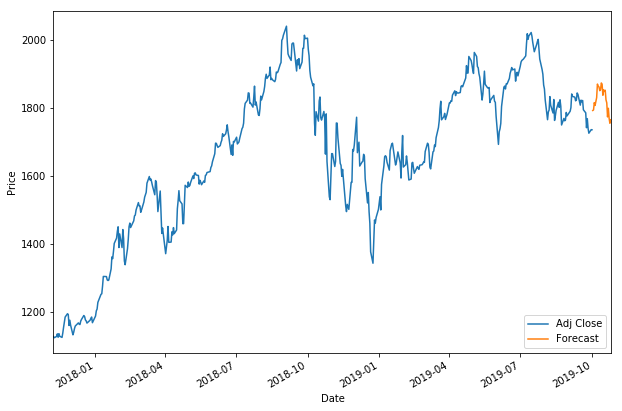

In [27]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in prediction:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()